In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
train_path = 'ritika/train'
test_path = 'ritika/test'

img_height, img_width = 128, 128
batch_size = 32


In [4]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)


Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [5]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    MaxPooling2D(2, 2),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(6, activation='softmax')  # 6 classes
])


C:\Users\Swapnil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
model.compile(
    optimizer=Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [7]:
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)


C:\Users\Swapnil\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
AttributeError: module 'ml_dtypes' has no attribute 'float4_e2m1fn'
341/341 ━━━━━━━━━━━━━━━━━━━━ 239s 694ms/step - accuracy: 0.5948 - loss: 1.0645 - val_accuracy: 0.8432 - val_loss: 0.4832
Epoch 2/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 148s 434ms/step - accuracy: 0.8553 - loss: 0.4117 - val_accuracy: 0.8781 - val_loss: 0.3279
Epoch 3/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 117s 344ms/step - accuracy: 0.8941 - loss: 0.3057 - val_accuracy: 0.9470 - val_loss: 0.1564
Epoch 4/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 142s 343ms/step - accuracy: 0.9092 - loss: 0.2652 - val_accuracy: 0.9463 - val_loss: 0.1499
Epoch 5/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 116s 339ms/step - accuracy: 0.9215 - loss: 0.2143 - val_accuracy: 0.9555 - val_loss: 0.1349
Epoch 6/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 115s 338ms/step - accuracy: 0.9330 - loss: 0.1860 - val_accuracy: 0.9296 - val_loss: 0.2155
Epoch 7/10
341/341 ━━━━━━━━━━━━━━━━━━━━ 116s 341ms/step - accuracy: 0.9354 - loss: 0.1868 - val_accuracy: 0.9681 - val_loss: 0.0972
Epoch 8/

In [8]:
loss, accuracy = model.evaluate(test_generator)
print(f"Test Accuracy: {accuracy*100:.2f}%")


85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 135ms/step - accuracy: 0.9701 - loss: 0.0742
Test Accuracy: 97.00%


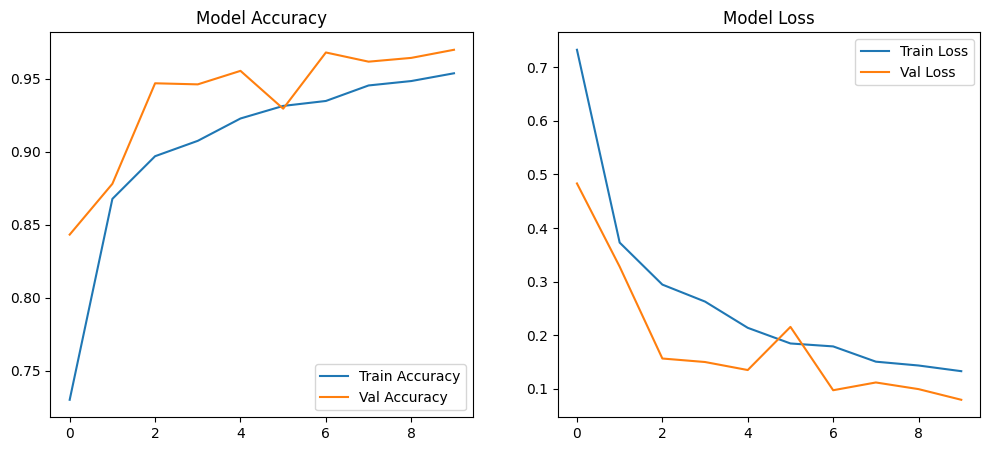

In [9]:
plt.figure(figsize=(12, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.legend()

plt.show()


In [10]:
test_generator.reset()
pred = model.predict(test_generator)
y_pred = np.argmax(pred, axis=1)
y_true = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_labels))


85/85 ━━━━━━━━━━━━━━━━━━━━ 10s 116ms/step
Classification Report:

               precision    recall  f1-score   support

  freshapples       0.99      0.96      0.98       395
  freshbanana       1.00      1.00      1.00       381
 freshoranges       0.99      0.94      0.96       388
 rottenapples       0.94      0.97      0.96       601
 rottenbanana       1.00      0.98      0.99       530
rottenoranges       0.92      0.96      0.94       403

     accuracy                           0.97      2698
    macro avg       0.97      0.97      0.97      2698
 weighted avg       0.97      0.97      0.97      2698



In [13]:
model.save("fruit_freshness_model.keras")


In [15]:
from tensorflow.keras.models import load_model

# Load your model
model = load_model("fruit_freshness_model.keras", compile=False)

# Compile manually (since we skipped optimizer state)
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [21]:
import os

folder = "ritika/train/freshapples"
files = os.listdir(folder)
print(files)


['rotated_by_15_Screen Shot 2018-06-08 at 4.59.36 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.44 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 4.59.57 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.03 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.12 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.18 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.26 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.00.50 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.08 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.15 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.22 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.29 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.34 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.01.41 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.02.24 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.02.31 PM.png', 'rotated_by_15_Screen Shot 2018-06-08 at 5.02.38 PM.png', 'rotated_by_1

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
Predicted Class: rottenapples
Confidence: 98.03%


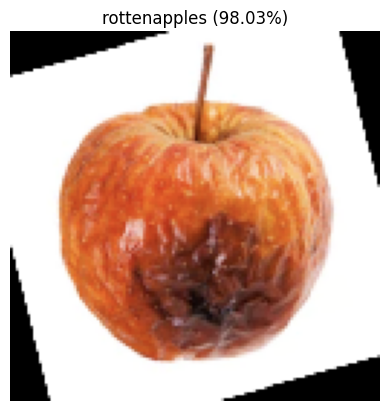

In [25]:
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt

# 🔄 Replace this with your actual image path
img_path = "ritika/test/rottenapples/rotated_by_15_Screen Shot 2018-06-07 at 2.19.37 PM.png"

# Load image
img = image.load_img(img_path, target_size=(128, 128))
img_array = image.img_to_array(img)
img_array = img_array / 255.0
img_array = np.expand_dims(img_array, axis=0)

# Predict
pred = model.predict(img_array)
predicted_class = np.argmax(pred)
confidence = np.max(pred)

# Use your class names
class_names = ['freshapples', 'freshbanana', 'freshoranges', 
               'rottenapples', 'rottenbanana', 'rottenoranges']

# Show prediction
print("Predicted Class:", class_names[predicted_class])
print(f"Confidence: {confidence*100:.2f}%")

# Display the image with predicted label
plt.imshow(img)
plt.title(f"{class_names[predicted_class]} ({confidence*100:.2f}%)")
plt.axis('off')
plt.show()


In [23]:
import os

if os.path.exists(img_path):
    print("✅ Image found!")
else:
    print("❌ Image NOT found. Check the path again.")


✅ Image found!
